In [1]:
from __future__ import print_function
import keras, pickle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
infile = open('../data/data8.pickle','rb')
new_dict = pickle.load(infile)
y_train = new_dict['y_train']
y_test = new_dict['y_test']
x_train = new_dict['x_train'][:,0,:,:]
x_test = new_dict['x_test'][:,0,:,:]
y_train

array([37, 27, 38, ..., 11, 14, 30])

In [3]:
batch_size = 100
epochs = 8
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
num_chanels = 1
num_classes = len(set(y_train))

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(f"We have data prepared for backend [{keras.backend.backend()}]")
print(input_shape)

We have data prepared for backend [tensorflow]
(32, 32, 1)


In [5]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices, like get_dummies on pandas
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(input_shape)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
loss_function = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adadelta()
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 86989 samples, validate on 12630 samples
Epoch 1/8
86989/86989 [==============================] - 143s 2ms/step - loss: 0.6687 - accuracy: 0.8166 - val_loss: 0.1834 - val_accuracy: 0.9512
Epoch 2/8
86989/86989 [==============================] - 143s 2ms/step - loss: 0.1423 - accuracy: 0.9589 - val_loss: 0.1605 - val_accuracy: 0.9587
Epoch 3/8
86989/86989 [==============================] - 143s 2ms/step - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.1418 - val_accuracy: 0.9633
Epoch 4/8
86989/86989 [==============================] - 143s 2ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.1398 - val_accuracy: 0.9655
Epoch 5/8
86989/86989 [==============================] - 4936s 57ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.1377 - val_accuracy: 0.9678
Epoch 6/8
86989/86989 [==============================] - 147s 2ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.1440 - val_accuracy: 0.9677
Epoch 7/8
86989/86

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13892917632188423
Test accuracy: 0.9693586826324463


In [10]:
history.history

{'val_loss': [0.18344680206320726,
  0.16046410542415043,
  0.1418142556518859,
  0.1398132825557877,
  0.13769110410842197,
  0.1440183010323951,
  0.1358236008620897,
  0.13892917238140473],
 'val_accuracy': [0.9512272477149963,
  0.958748996257782,
  0.963341236114502,
  0.9654790163040161,
  0.9677751660346985,
  0.967695951461792,
  0.9692794680595398,
  0.9693586826324463],
 'loss': [0.668745651931781,
  0.14234966496915574,
  0.08334871394327995,
  0.059201776166557585,
  0.04465891558080922,
  0.035469977542797855,
  0.02982485800098623,
  0.025346610024174807],
 'accuracy': [0.8165975,
  0.95891434,
  0.97557163,
  0.98250353,
  0.98694086,
  0.9891366,
  0.99072295,
  0.991953]}

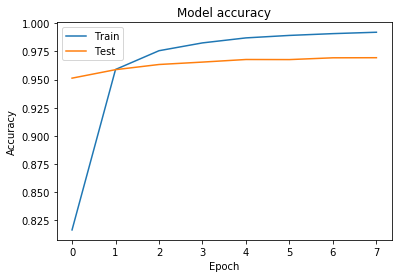

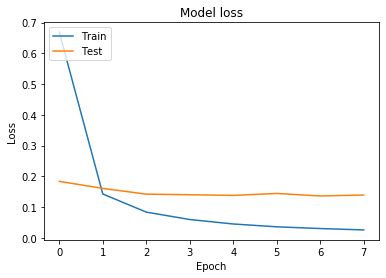

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[2.5843521e-29 6.1571481e-26 3.1148099e-25 6.7346477e-21 2.0054341e-25
 3.0727771e-22 3.8378555e-22 8.9852959e-33 1.7999674e-30 8.6721928e-23
 1.8854211e-23 1.7623620e-21 3.0888535e-30 1.0536749e-23 1.1483674e-20
 6.1613572e-25 1.7210300e-30 2.4743574e-27 1.7227484e-18 3.4843485e-27
 2.3158560e-14 1.8913169e-27 9.1860279e-19 3.4332901e-18 1.8117228e-19
 1.0000000e+00 2.1470292e-20 1.9618279e-17 1.1272562e-20 9.5472632e-18
 5.4275902e-20 1.8223042e-22 1.9077633e-22 2.4789482e-20 3.0848192e-27
 3.6444345e-23 1.2528700e-23 1.6262377e-26 1.4809966e-23 1.1609142e-23
 2.2718975e-27 2.2006690e-22 9.2043107e-25]
25


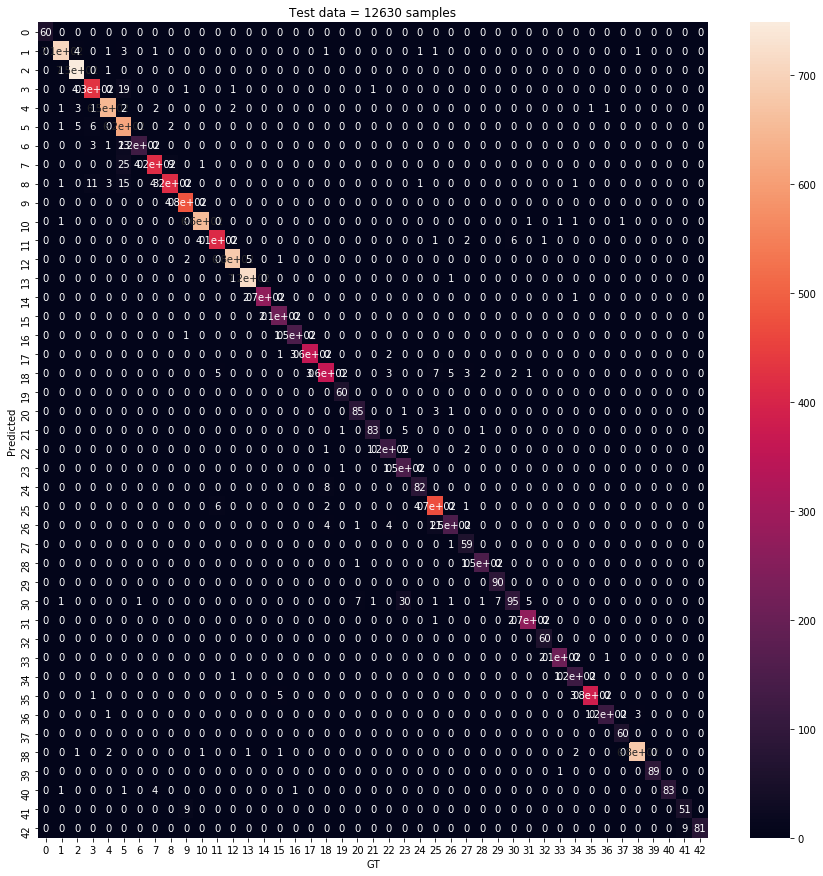

In [12]:
# Plot confusion matrix to have a more detailed view of cross-class missclassifications
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

## Use argmax to project output probabilites as class index label
proba = model.predict(x_test)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_pred)

figure(figsize=(15,15))
sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [13]:
#model.save("data/model_train.h5")
model.save_weights('../data/model/model_trained_weights.h5')
